<a href="https://colab.research.google.com/github/harmalh/HAWK-ML-DL/blob/master/4_Lineare_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Am Anfang eines Projekts im Bereich maschinelles Lernen importiert man häufig "Libraries" (von anderen Menschen geschriebene Sammlungen von Modulen und Funktionen), um mit diesem dann die eigene Analyse durchzuführen. Viele Libraries haben eigene Abkürzungen. Dies hat praktische Gründe. Um zum Beispiel Funktionen aus "pandas" zu verwenden muss man jetzt nur noch pd.XXX statt pandas.XXX schreiben.

Um mehr über einzelne Libraries und die Vielzahl ihrer Module und Funktionen zu erfahren empfehlen wir mit Nachdruck, sich die Dokumentation der einzelnen Libraries sorgfältig durchzulesen. Innerhalb von Jupyter Notebook könnt ihr ebenfalls mehr über Libraries und einzelne Funktionen erfahren. Hierzu verwendet ihr einfach help("Name"). Beispielsweise help(pd).

In [ ]:
#pip install plotly
#pip install statsmodels
#pip install plotly==5.3.1

In [1]:
pip install plotly==5.3.1

     |████████████████████████████████| 23.9 MB 6.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import plotly.express as px

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vToOrjGOMiSz4L4hQ1YogxttSBPxPjmi45k9Dgl9UHwmsv_wlC4LfUm1I17kDmVvHIA7WBvplphu9R_/pub?output=csv')

Danach importiert man häufig den Datensatz, mit dem man arbeiten möchte. Pandas arbeitet mit sogenannten DataFrames. Diese können viele Dateiendungen (csv, xml, txt) haben. Um mehr über die Dateiendungen zu erfahren, mit denen pandas arbeiten kann, lesen Sie sich gerne die entsprechende Dokumentation durch. Häufig verwendet man sogenannte csv-files (comma-separated-values), da sie einfach einzulesen und schlicht formatiert sind.

Heute arbeiten wir mit einem Datensatz des Autoverkaufmarkts Cardegho (https://www.cardekho.com/). Den originalen Datensatz können Sie auf der folgenden Kaggle-Seite finden:

https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

https://deepnote.com/@deepluz/Optimization-Project-Car-price-prediction-WqXvOSo8T-OYqfHnhyXPAw

https://www.kaggle.com/samyakuttam/vehicle-price-prediction


Beginnen wir damit, uns das Dataframe anzeigen zu lassen:

In [8]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Mit der .head() Funktion von pandas kann man sich die obersten Werte eines durch pandas erstellten DataFrames ansehen. Dies hilft dabei, einen ersten Überblick über die eigenen Werte zu bekommen. Die Anzahl der angezeigten Reihen kann durch den Wert in der Klammer bestimmt werden. Merke: in Python startet der erste Wert bei 0, nicht 1!

In [9]:
df.head(4)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0


In [10]:
df.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Zusätzlich zu einem Überblick der eingetragenen Werte sollten wir uns jetzt noch die Datentypen anzeigen lassen. Wir erinnern uns: Modelle im Bereich maschinelles Lernen benötigen Zahlen, um Modelle aufstellen zu können:

In [11]:
df.transmission.value_counts(dropna=False)

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

In [12]:
df.fuel.value_counts(dropna=False)

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [13]:
df.owner.value_counts(dropna=False)

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [14]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

Zu einer vollständigen Datenanalyse gehört auch die Vorbereitung und Bereinigung von Datensätzen. Dies ist jedoch kein zentraler Bestandteil des Kurses. Der Datensatz ist bereits größtenteils bereinigt, allerdings sollten wir trotzdem kurz einen Blick auf fehlende Werte werfen. Hierzu lassen wir uns die Summe der fehlenden Werte mit folgendem Code anzeigen. Hierbei bezieht sich die Funktion .isnull() auf das Dataframe und zählt die fehlenden Werte. mit der .sum() Funktion summieren wir diese für jede Variable in unserem Dataframe:

In [15]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

Der Datensatz enthält fehlende Werte, welche scheinbar einem Muster folgen.

Wie wir sehen enthalten die Variablen/Features mileage engine, max_power, torque (Drehzahlmoment) und seats fehlenden Werte. Weiterhin handelt es sich hierbei in der Mehrzahl um Objekte, mit denen wir ein Modell im Bereich maschinelles Lernen erst trainieren können, wenn wir diese Features entsprechend bearbeitet haben. Dies wollen wir zu diesem Zeitpunkt jedoch nicht vertiefen.

Wir entfernen die entsprechenden Features also aus unserem Dataframe. Dies tun wir, indem wir ein neues Dataframe erstellen, welches die entsprechenden Features nicht mehr enthält. Wir können dann mit dem neuen Dataframe "car" weiterarbeiten.

(Ein weiterer Hinweis: Sie müssen in der Funktion den Hinweis "axis=1" geben, damit Python weiß, dass sie Columns/Spalten entfernen möchten. Erinnern Sie sich an unser NumPy Tutorial, wo wir besprochen haben, dass NumPy Arrays mehrere Achsen haben. Die Achse 1 steht für Spalten/Features. Dies ist hier entscheidend):

In [16]:
car = df.drop(['mileage', 'engine', 'max_power', 'torque', 'seats', 'owner'], axis=1)

In [17]:
car

,name,year,selling_price,km_driven,fuel,seller_type,transmission
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual
...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual


An dieser Stelle wollen wir uns eine deskriptive Analyse aller verbleibenden Variablen ausgeben lassen. Hierzu müssen wir vorerst noch das Feature 'Year' formatieren damit Python weiß, dass es sich hierbei um ein Datum handelt:

(weitere Infos hier: https://datatofish.com/descriptive-statistics-pandas/)

Weitere Infos, wie ihr euch nur einen bestimmten Teil eines Datensatzes anzeigen lasst, finden sie unter anderem in vielen Pandas-Tutorials, wie zum Beispiel hier: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

Lasst uns jetzt mit der explorativen Datenanalyse beginnen. Wir erinnern uns: eine explorative Datenanalyse ist Bestandteil eines jeden Machine-Learning-Projekts. Die explorative Datenanalyse dient dazu, sich mit dem Datensatz vertraut zu machen, um ihn für die Modellbildung besser zu verstehen.

Fangen wir damit an, uns den Preis der Autos anzuschauen.

In [18]:
car['selling_price'].median()

450000.0

Hier fällt uns, wie auch weiter oben, eindeutig auf, dass der Verkaufspreis extrem "hoch" ist. Dies liegt daran, dass es sich bei https://www.cardekho.com/ um einen indischen Anbieter handelt, die Autopreise daher in Rupie notiert werden.

Zum einfacheren Verständnis sollten wir die "sales_price" Spalte/Feature in Euro umwandeln. Hierfür müssen wir den Wert mit dem Wechselkurs 0.012 multiplizieren:

In [19]:
car['selling_price'] = car['selling_price']*0.012

Nun schauen wir uns mit Hilfe der describe Funktion an, wie der Preis ungefähr verteilt ist:

In [20]:
car['selling_price'].describe()

count      8128.000000
mean       7659.261692
std        9675.040842
min         359.988000
25%        3059.988000
50%        5400.000000
75%        8100.000000
max      120000.000000
Name: selling_price, dtype: float64

In [21]:
car['selling_price'].median()

5400.0

Nachdem wir dieses "Problem" behoben haben wenden wir uns der weiteren deskriptiven Analyse zu.

Lassen wir uns die Menge der Autos für die jeweiligen Kraftstofftypen anzeigen:

<Axes: xlabel='fuel', ylabel='count'>

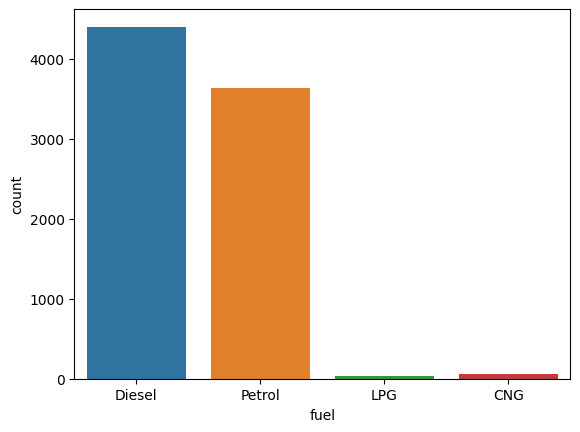

In [22]:
sns.countplot(x = 'fuel', data = car)

Wir sehen, dass die allermeisten Kraftstofftypen Diesel oder Benzin sind.

Schauen wir uns jetzt die Preise nach Kraftstofftypen an:

<Axes: xlabel='fuel', ylabel='selling_price'>

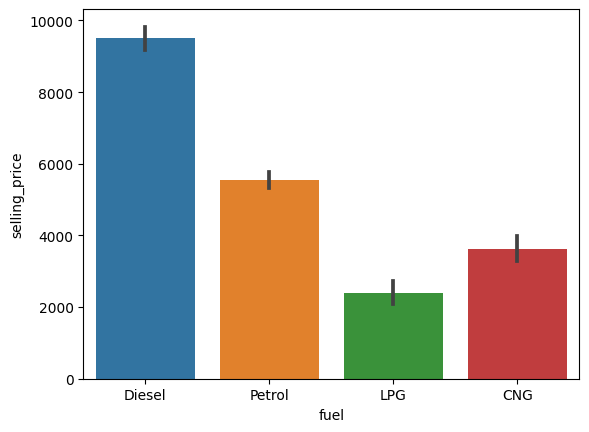

In [23]:
sns.barplot(x = 'fuel', y = 'selling_price', data = car)

Weitere interessante Angaben könnten z.B. die Verteilung der verkauften Autos nach manuellem und automatischen Getriebe sein:

<Axes: xlabel='transmission', ylabel='count'>

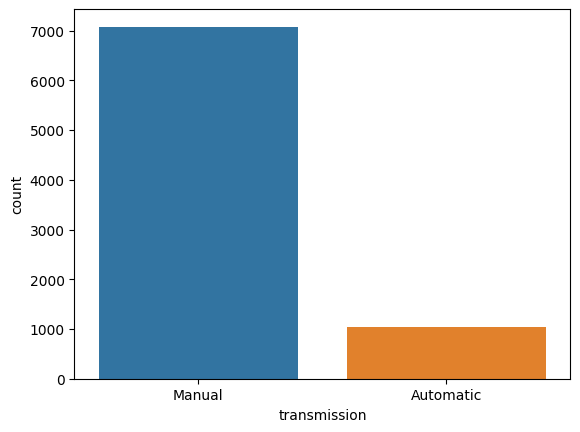

In [24]:
sns.countplot(x = 'transmission', data = car)

<Axes: xlabel='transmission', ylabel='selling_price'>

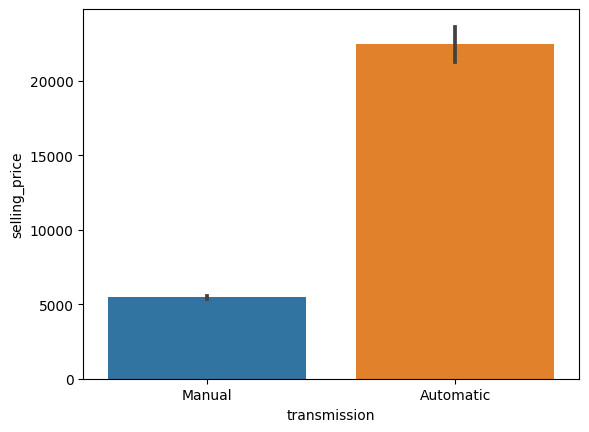

In [25]:
sns.barplot(x = 'transmission', y = 'selling_price', data = car)

Wir sehen, dass Autos auf der Plattform mit einem automatischen Getriebe sehr viel teurer sind.

Lassen wir uns nun die gefahrenen Kilometer anzeigen.
Eine einzelne Spalte kann man sich ansehen, indem man den Namen der entsprechenden Spalte hinter dem Dataframe in eckige
Klammern und Anführungszeichen setzt.

In [26]:
car['km_driven']

0       145500
1       120000
2       140000
3       127000
4       120000
         ...  
8123    110000
8124    119000
8125    120000
8126     25000
8127     25000
Name: km_driven, Length: 8128, dtype: int64

In [27]:
car['km_driven'].mean()

69819.51082677166

Schauen wir uns jetzt weiter die Daten an. Im folgenden Abschnitt wollen wir uns nur die Preise von Autos anzeigen, welche "Hyundai" im Namen tragen, also von der Firma Hyundai sind:

In [28]:
car_hyundai = car[car['name'].str.contains("Hyundai")]

In [29]:
car_hyundai.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission
3,Hyundai i20 Sportz Diesel,2010,2700.0,127000,Diesel,Individual,Manual
5,Hyundai Xcent 1.2 VTVT E Plus,2017,5280.0,45000,Petrol,Individual,Manual
17,Hyundai i20 1.4 CRDi Asta,2012,6000.0,53000,Diesel,Individual,Manual
19,Hyundai i20 2015-2017 Asta 1.4 CRDi,2016,8160.0,100000,Diesel,Individual,Manual
33,Hyundai i20 1.2 Asta Dual Tone,2018,8760.0,2388,Petrol,Individual,Manual


Wir können uns jetzt auch den Mittelwert der numerischen Variablen durch die Nutzung der .mean() Funktion anzeigen lassen.

In [30]:
car_hyundai[['selling_price', 'km_driven']].mean()

selling_price     5502.652401
km_driven        64823.558304
dtype: float64

Durchschnittlich kosten Autos also 5.500 Euro auf der Plattform.

Schauen wir uns nun an, ob dieser Eindruck auch der Verteilung entspricht:

<Axes: xlabel='selling_price', ylabel='Density'>

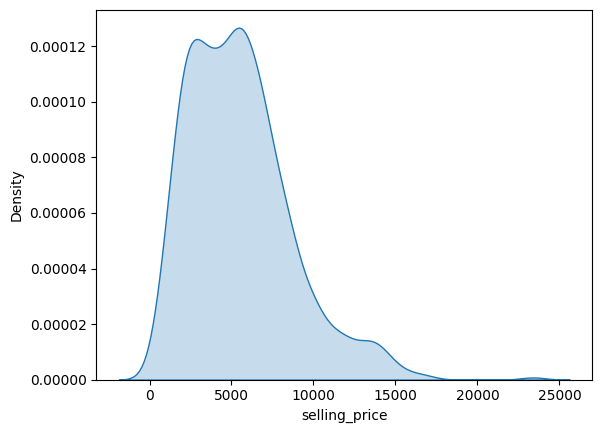

In [31]:
sns.kdeplot(data=car_hyundai, x="selling_price", log_scale=False, fill=True)

Eine weitere kumulative Visualisierung zeigt, dass die allermeisten Autos bei unter 15.000 Euro verkauft sind:

<Axes: xlabel='selling_price', ylabel='Count'>

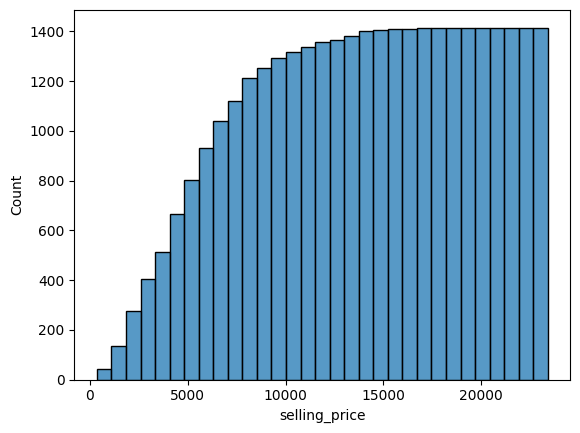

In [32]:
sns.histplot(data=car_hyundai, x="selling_price", cumulative=True)

Dies können wir auch mit dem gesamten "Sample"/Datensatz vergleichen:

<Axes: xlabel='selling_price', ylabel='Count'>

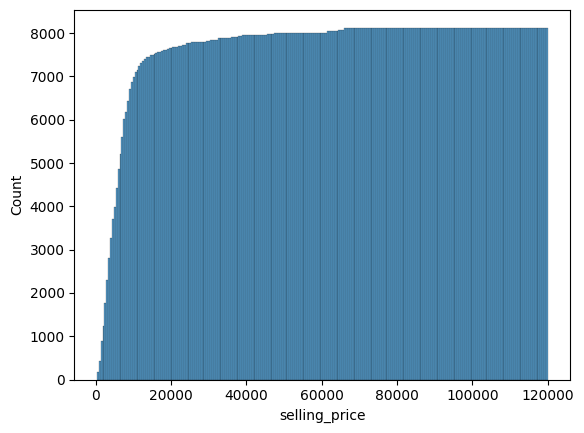

In [33]:
sns.histplot(data=car, x="selling_price", cumulative=True)

Schauen wir uns an, wie nicht nur die Hyundai, sondern die gesamten Preise verteilt sind. Hier scheint es in unserem Datensatz vermutlich "Ausreißer" zu geben. Dies wollen wir durch eine deskriptive Datenanalyse untersuchen:

In [34]:
print(car['selling_price'].max())

120000.0


Ein Violin-Plot kann uns leicht die Verteilung unserer Daten veranschaulichen. Wie wir gleich sehen werden gibt es einige wenige Preise, welche relativ hoch sind:  

<Axes: ylabel='selling_price'>

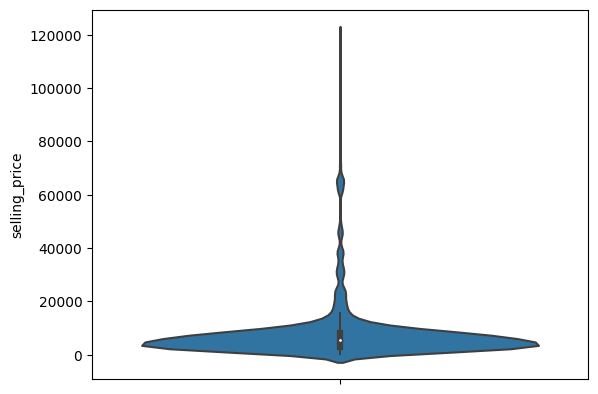

In [35]:
sns.violinplot(y=car['selling_price'], inner='box')

Diesen Eindruck können wir uns auch durch die Verwendung eines Dichte-Diagramms (kde-Plots) oder Histograms bestätigen:

<Axes: xlabel='selling_price', ylabel='Density'>

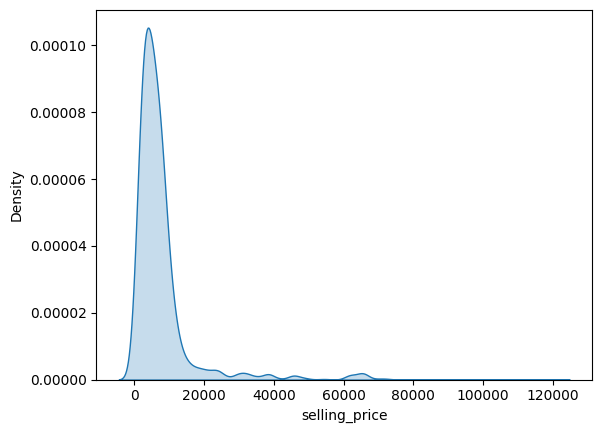

In [36]:
sns.kdeplot(data=car, x="selling_price", fill=True, gridsize=500)

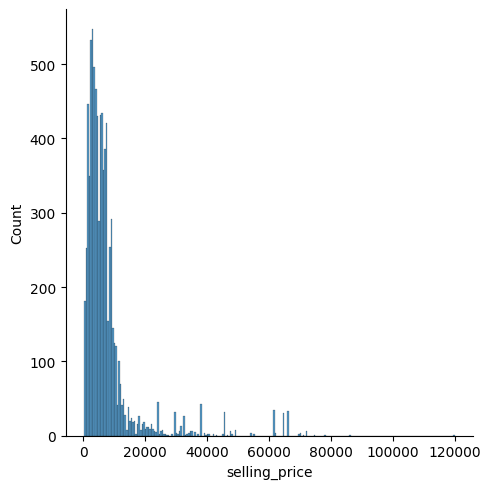

In [37]:
sns.displot(data=car, x="selling_price", kind='hist')

Hier scheinen unsere Daten eindeutig sogennante "Fat Tails", also extreme Verteilungen zu haben. Es zeigt sich, dass die Preise einiger weniger Autos extrem hoch sind.

Als Vorbereitung auf unsere lineare Regression wollen wir uns einen Eindruck über den Zusammenhang von gefahrenen Kilometern und Preis machen. Dazu wollen wir uns die Korrelation von gefahrenen Kilometern und den Preis anzeigen lassen.

Definition: Korrelation beschreibt den Zusammenhang zwischen zwei Variablen. Variablen können entweder positiv, negativ oder nicht korreliert sein. Weitere Infos zur Implementierung von Korrelation in Python:
https://realpython.com/numpy-scipy-pandas-correlation-python/

Wir schauen uns die Korrelation an, indem wir die Pandas-Funktion: X.corr(Y) verwenden:

In [38]:
car['km_driven'].corr(car['selling_price'])

-0.22553375557218944

Die negative Korrelation zeigt uns, dass es einen (schwachen) negativen Zusammenhang zwischen Kilometerstand und Verkaufspreis gibt.

Auch ein Scatterplot gibt eine gute Visualisierung, um den Zusammenhang grafisch zu verstehen:

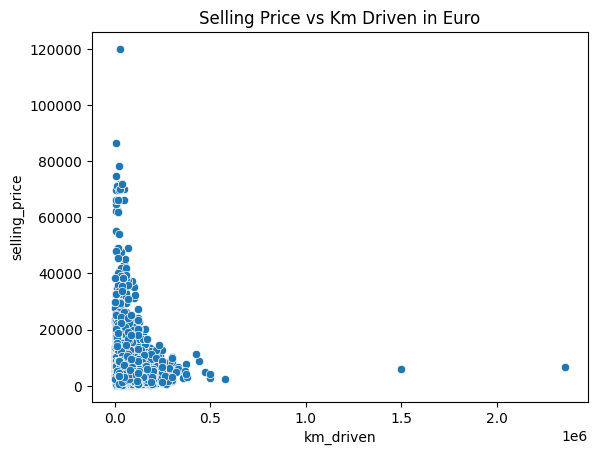

In [39]:
sns.scatterplot(x = 'km_driven', y = 'selling_price', data = car);
plt.title('Selling Price vs Km Driven in Euro')
plt.show()

#Durchführung einer linearen Regression in Seaborn, Plotly und sklearn

Eine Trendlinie kann uns den Zusammenhang zwischen Kilometerstand und Verkaufspreis anzeigen:

<Axes: xlabel='km_driven', ylabel='selling_price'>

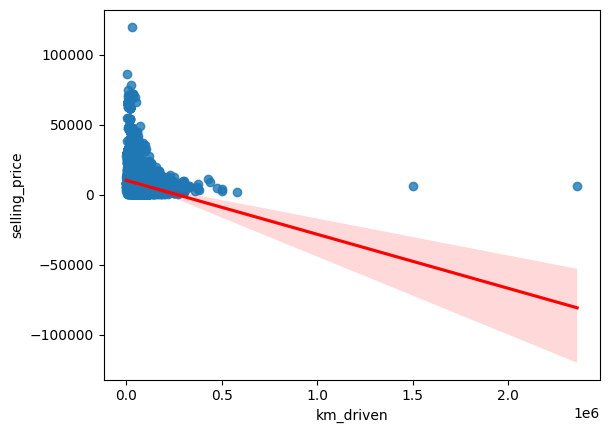

In [40]:
sns.regplot(x=car['km_driven'], y=car['selling_price'],line_kws={'color':'red'})

Offensichtlich scheint diese Trendlinie "fehlerhaft" zu sein, sie zeigt uns keinen wirklich braucbaren Trend innerhalb der Daten an. Auch wird auf der Skala für gefahrene Kilometer der Logarithmus von 6 angegeben, was bedeutet, dass die Skala extrem verkürzt wird aufgrund von großen Werten im Datensatz.

Wie wir sehen liegt dies offensichtlich an einigen "Outliern"/Ausreißern. Bauen wir uns ein paar Dataframes/Tabellen, bei denen der Wert der gefahrenen Kilometer variiert:

In [41]:
car_500 = car[car['km_driven'] < 500000]

In [42]:
car_200 = car[car['km_driven'] < 200000]

In [43]:
car_100 = car[car['km_driven'] < 100000]

##Lineare Regression in Seaborn:

Beginnen wir nun damit, unsere lineare Regression in seaborn zu implementieren.

Hierzu können wir die regplot-Funktion aus seaborn verwenden:

<Axes: xlabel='km_driven', ylabel='selling_price'>

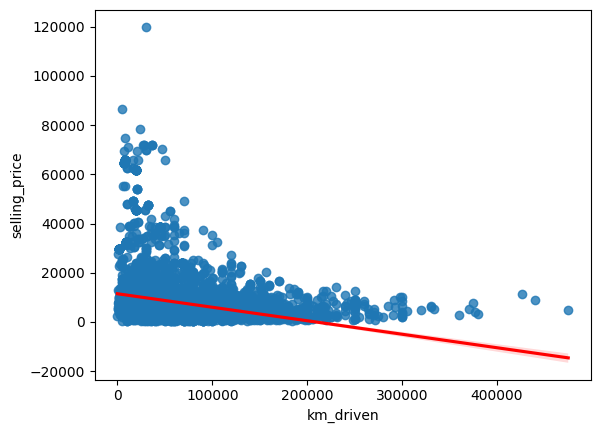

In [44]:
sns.regplot(x=car_500['km_driven'], y=car_500['selling_price'], line_kws={'color':'red'})

<Axes: xlabel='km_driven', ylabel='selling_price'>

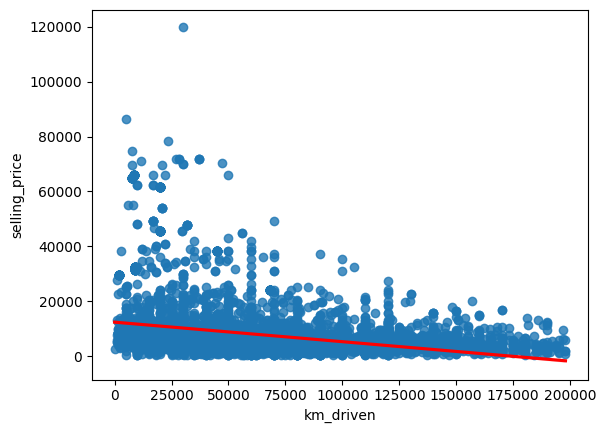

In [45]:
sns.regplot(x=car_200['km_driven'], y=car_200['selling_price'], line_kws={'color':'red'})

<Axes: xlabel='km_driven', ylabel='selling_price'>

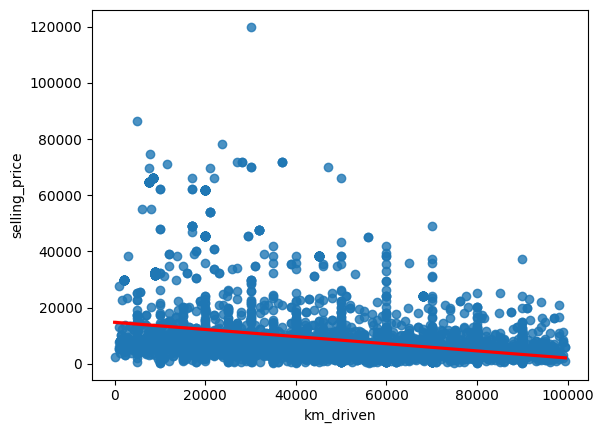

In [46]:
sns.regplot(x=car_100['km_driven'], y=car_100['selling_price'], line_kws={'color':'red'})

## Zusatz

Lineare Regression in Plotly (Kann in SageMaker Studio Lab ohne zusätzliche Plugins NICHT dargestellt werden. Siehe linke Seite mit Puzzle-Teil für Plugins:

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

Zur Visualisierung verwenden wir als Alternative das express-modul der Plotly-Library. Dies verwendet die Abkürzung "px" für "**P**lotly **E**xpress". Zur Visualisierung verwenden wir erneut einen sogenannten Scatter-Plot. (Mehr Informationen in der Dokumentation: https://plotly.com/python/line-and-scatter/)

Auf der X-Achse tragen wir jetzt den Kilometerstand, auf der y-Achse den Preis ein. Die Funktion benötigt den Hinweis, dass die Trendlinie eine "ols"-Regression sein soll:

In [ ]:
px.scatter(car_100, x='km_driven', y='selling_price', trendline="ols", trendline_color_override="red")

##Alternativ/Zusatz: Lineare Regression in sklearn

Beide vorherigen Libraries werden hauptsächlich für Visualisierungen verwendet und stoßen dabei an ihre Grenzen, was die Erstellung von komplexeren Modellen im Bereich maschinelles Lernen angeht. Daher wird an dieser Stelle noch eine lineare Regression mit der im Bereich maschinelles Lernen sehr beliebten sklearn-Library eingeführt.

Zuerst müssen wir die Funktion LinearRegression aus dem sklearn modul ".linear_model" importieren:

In [ ]:
from sklearn.linear_model import LinearRegression

Definition des zu verwendenden Modells, der linearen Regression, in der Variable "model" (vereinfacht später die Arbeit, um weitere Funktionen auf unser Modell anzuwenden)

In [ ]:
model = LinearRegression()

Hier definieren wir die unabhängige Variable/das erklärende Feature. Wir speichern die Daten in einer Variable, indem wir diese mit einem = Zeichen gleich der entsprechenden Spalte setzen. Dies vereinfacht uns später die Nutzung. Wir müssen die Werte des erklärenden features "km_driven" umformen, damit Python weiß, dass es sich hierbei um eine Spalte mit mehreren Reihen handelt. Die hintere 1 bedeutet, dass es sich um eine Spalte handelt; durch -1 werden automatisch alle Reihen ausgelesen.

Quelle:https://stackoverflow.com/questions/47761744/cant-do-linear-regression-in-scikit-learn-due-to-reshaping-issue

In [ ]:
X = car_100.km_driven.values.reshape(-1, 1)

Nachdem wir unsere Daten der Einfachheit halber in einem Feature/Variabe X gespeichert haben, können wir unser Modell jetzt auf Grundlage der Daten trainieren/fitten. Normalerweise würde man sagen, man fittet sein Modell zu den Daten.

In [ ]:
model.fit(X, car_100.selling_price)

Die folgenden Befehle dienen der Visualisierung der Ergebnisse der linearen Regression. Hier wird zuerst die Länge der X-Achse definiert.

Die Reichweite der y-Achse wird durch das hinzufügen der .predict Funktion zu unserem vorher trainierten/gefitteten Modell erstellt. Durch diese Fuktion wird die notwendige Länge der y-Achse bestimmt.

In [ ]:
x_range = np.linspace(X.min(), X.max(),100)

In [ ]:
y_range = model.predict(x_range.reshape(-1, 1))

Wie oben zu sehen ist sind die Beschriftungen zwar vorhanden, es fehlen allerdings noch die entsprechenden Werte. Diese werden über das hinzufügen der Funktion ".add_traces(go.Scatter()) hinzugefügt.

In [ ]:
fig = px.scatter(car_100, x='km_driven', y='selling_price', opacity=1)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Lineare Regression'))